### Proposal feedback 
Hello group 15, I think your introduction, initial data explore, and method section all are well written, I understood well you group's intention.  
However, I hold a slightly different idea on the null hypothesis. Please see the following my demonstration of a case which match your null but show significant relation between positive covid and group status. 

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tidymodels))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(infer))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
# consider all the data frama are samples

# Here I make a data frama of 100 people in total:

base_df_1 <- data.frame(group = rep(c(1), each = 80)) # 80 of them labelled as 1, so group 1 account for 80% of the population
base_df_0 <- data.frame(group = rep(c(0), each = 20)) # 20 of them labelled as 0, so group 0 account for 20% of the population. 


# summarize the base population df 

base_df <- rbind(base_df_1, base_df_0) %>% 
    mutate(group = as.factor(group))

base_df_summary <- base_df %>%
    group_by(group) %>%
    summarize(n = n()) %>%
    mutate(p = n / nrow(base_df))

base_df_summary

group,n,p
<fct>,<int>,<dbl>
0,20,0.2
1,80,0.8


In [3]:
# Here I make a data frama of 10 people who are positive on covid 

covid_df_1 <- data.frame(covid = rep(c(1), each = 5)) # 5 of them are in group 1, so p_1 = 0.5,
covid_df_0 <- data.frame(covid = rep(c(0), each = 5)) # 5 of them are in group 2, so p_2 = 0.5

covid_df <- rbind(covid_df_1, covid_df_0) %>% 
    mutate(covid = as.factor(covid))

covid_df_summary <- covid_df %>%
    group_by(covid) %>%
    summarize(n = n()) %>%
    mutate(p = n / nrow(covid_df))

covid_df_summary

covid,n,p
<fct>,<int>,<dbl>
0,5,0.5
1,5,0.5


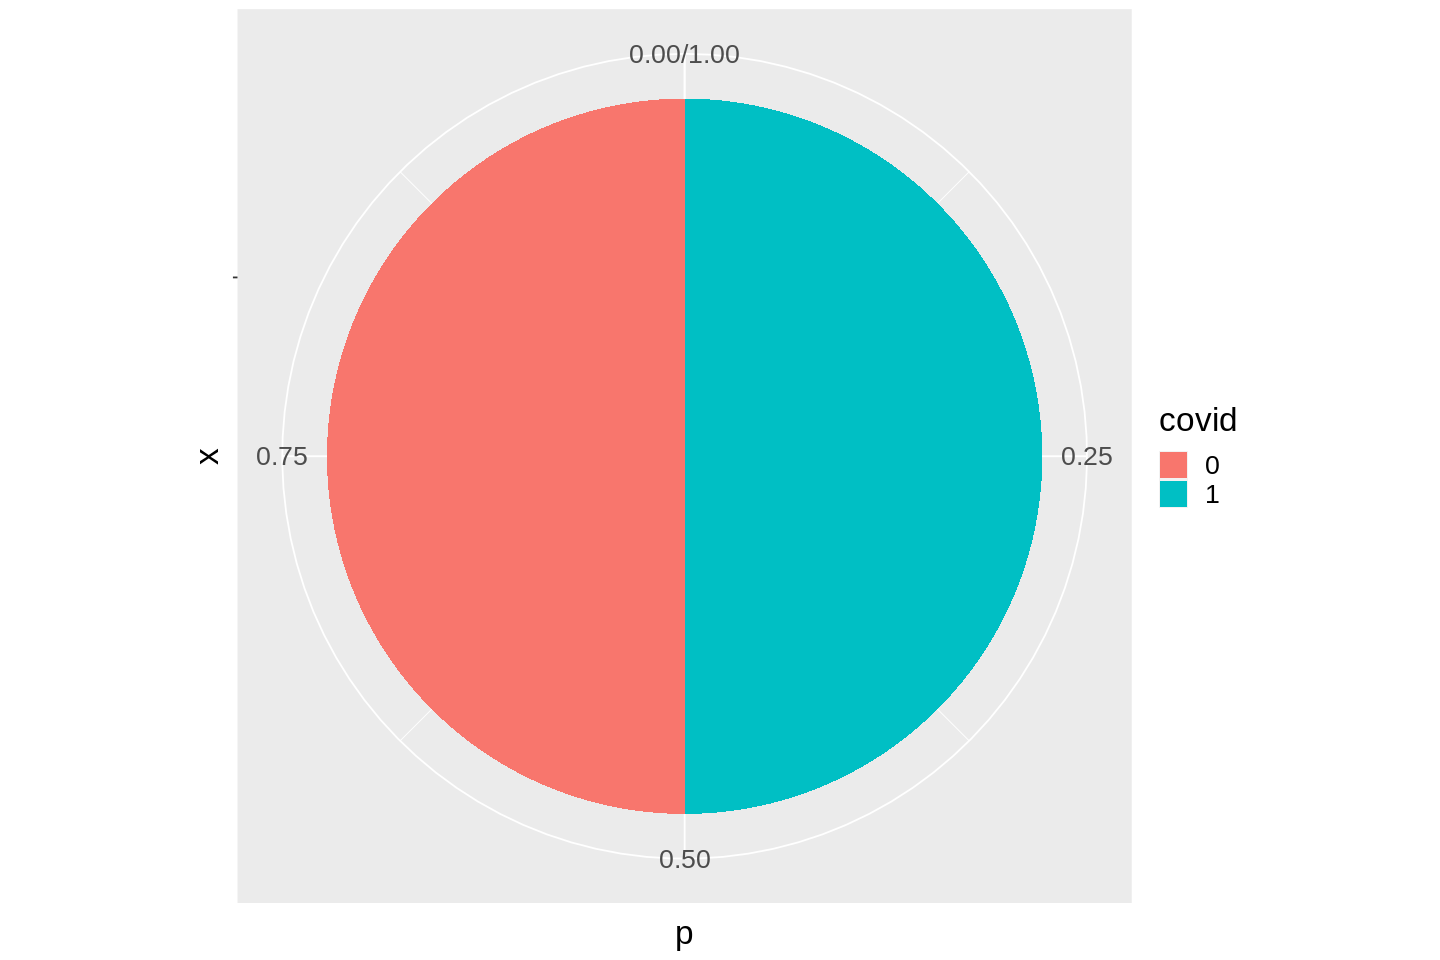

In [4]:
options(repr.plot.width = 12, repr.plot.height = 8)
pie <- covid_df_summary %>%
    ggplot(aes("", y= p, fill = covid)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y", start=0)+
    theme(text = element_text(size = 20))
pie

$H_o:$ The proportion of tested positive is same in each ethnicity$: p_1 = p_2$

In [5]:
# In this case, p_1 = p_2, then we do not reject your null hypothesis. 

# see the rate of group 1 have tested positive on covid?
rate_of_covid_group_1 <- 5/80 * 100
rate_of_covid_group_1

[1] 6.25

In [6]:
# but group 0?
rate_of_covid_group_0 <- 5/20 * 100
rate_of_covid_group_0


[1] 25

#### The chance of group 0 getting covid is 4 times higher than group 1. 
so under this logic, the chance of getting covid is significantly related to your status of in a particular group.   
  
In my mind, you probably need to bring in to your project **the population break down by ethnicity in the state of CA**.  
Check this website: the second graph shows population breakdown by ethnicity.  
https://www.ppic.org/publication/californias-population/  
In 2020, latino is the largest population group in CA, and this might related to why latino has the highest proportion in positive case in the pie chart in your proposal.   
  
In my mind, the issue is might be from the null hypothesis. A null hypothesis should reflect nothing interesting is happening.  
Thus a null hypothesis of   
*the rate of positive covid **per capita** is the same between different ethnic groups*  
might be more appropriate.  
$$\frac{Covid_{latino}}{Population_{latino}} = \frac{Covid_{white}}{Population_{white}} = \frac{Covid_{Asian}}{Population_{Asian}} = \frac{Covid_{Black}}{Population_{Black}}$$  
You can also check with the instruction team to see if you think my idea make no sense :) 